In [2]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import plotnine as p9
from statsmodels.stats.multitest import fdrcorrection

from sklearn import preprocessing
from sklearn import metrics
import networkx as nx
import mantel

import utils

import pickle

# 1 6 region

## Left

In [55]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr_rbe.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

selected_samples = info.index[info["Hemi"] == "Left"]
expr = expr.loc[:, selected_samples]
info = info.loc[selected_samples, :]
expr.shape

(5542, 28)

In [56]:
#expr_scale = pd.DataFrame(preprocessing.scale(expr.T, axis=0)).T
expr_scale = expr.copy()
corr_pr = expr_scale.corr(method='pearson')
corr_sp = expr_scale.corr(method='spearman')

upper_idx = np.triu(np.ones(shape=corr_pr.shape), 1).astype(bool)
r_pr_sp, p_pr_sp, _ = mantel.test(corr_pr.to_numpy()[upper_idx], corr_sp.to_numpy()[upper_idx], perms=10000, )
r_pr_sp, p_pr_sp

(0.9640804072520227, 0.0001)

In [57]:
region_group = {}
for i, r in enumerate(info["Region"]):
    if not r in region_group:
        region_group[r] = []
    region_group[r].append(i)
region_group = [ region_group[r] for r in region_group ]

In [6]:
corr_pr[corr_pr<0] = 0
pr_res = utils.significant_test_for_index(corr_pr, region_group, n_perm=1000)
pr_res[-2], pr_res[-1]

(array([0.01 , 0.006, 0.006]), array([0.01 , 0.009, 0.009]))

In [58]:
pr_dat_boxplot = pd.DataFrame(pr_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
pr_dat_scatter = pd.DataFrame([pr_res[0], pr_res[-1]], index=["Value", "FDR"]).T
pr_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
pr_dat_scatter["y"] = pr_dat_boxplot.groupby(pr_dat_boxplot["Index"]).quantile(0.99).loc[pr_dat_scatter["Index"]].values + 0.01
pr_dat_scatter

,Value,FDR,Index,y
0,0.677314,0.021,Strength fraction,0.657173
1,2.676237,0.027,Conductance,3.531208
2,3.495309,0.027,Normalized cut,4.722099


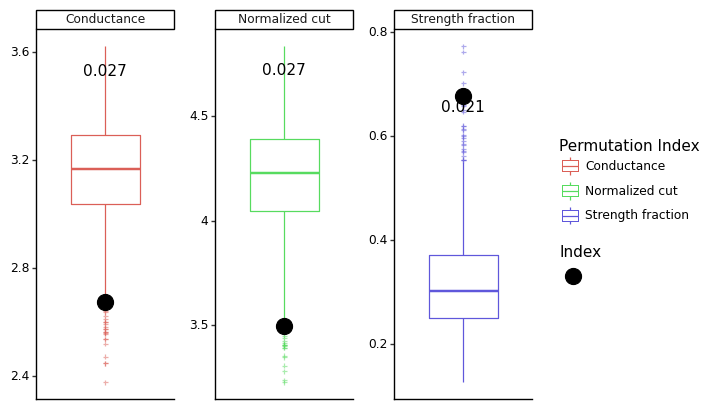

<ggplot: (8741588672395)>

In [59]:
pr_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), pr_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape='+', outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=pr_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), pr_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(pr_plot, "../res/2.pr_6region_left.pdf", units="in", width=6, height=4, verbose=False )
pr_plot

In [9]:
corr_sp[corr_sp<0] = 0
sp_res = utils.significant_test_for_index(corr_sp, region_group, n_perm=1000)
sp_res[-2], sp_res[-1]

(array([0.03 , 0.031, 0.031]), array([0.031, 0.031, 0.031]))

In [10]:
sp_dat_boxplot = pd.DataFrame(sp_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
sp_dat_scatter = pd.DataFrame([sp_res[0], sp_res[-1]], index=["Value", "FDR"]).T
sp_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
sp_dat_scatter["y"] = sp_dat_boxplot.groupby(sp_dat_boxplot["Index"]).quantile(0.99).loc[sp_dat_scatter["Index"]].values + 0.01
sp_dat_scatter

,Value,FDR,Index,y
0,0.201830,0.031,Strength fraction,0.215274
1,5.153623,0.031,Conductance,5.222537
2,6.183090,0.031,Normalized cut,6.265367


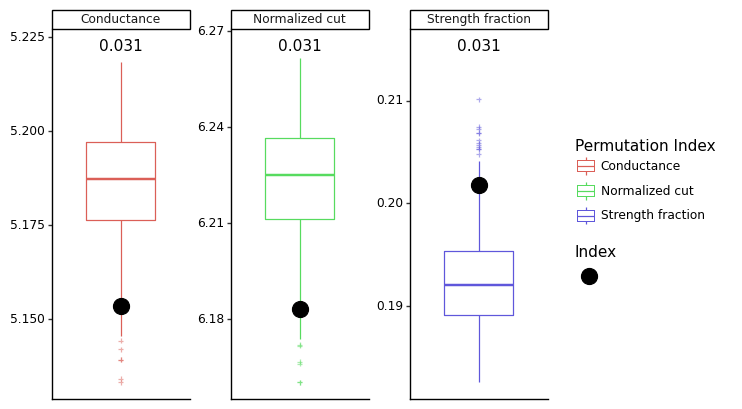

<ggplot: (8741586554103)>

In [11]:
sp_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), sp_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape="+", outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=sp_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), sp_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(sp_plot, "../res/2.sp_6region_left.pdf", units="in", width=6, height=4, verbose=False )
sp_plot

## Right

In [60]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

selected_samples = info.index[info["Hemi"] == "Right"]
expr = expr.loc[:, selected_samples]
info = info.loc[selected_samples, :]
expr.shape

(5542, 28)

In [61]:
#expr_scale = pd.DataFrame(preprocessing.scale(expr.T, axis=0)).T
expr_scale = expr.copy()
corr_pr = expr_scale.corr(method='pearson')
corr_sp = expr_scale.corr(method='spearman')

upper_idx = np.triu(np.ones(shape=corr_pr.shape), 1).astype(bool)
r_pr_sp, p_pr_sp, _ = mantel.test(corr_pr.to_numpy()[upper_idx], corr_sp.to_numpy()[upper_idx], perms=10000, )
r_pr_sp, p_pr_sp

(0.9756592102356791, 0.0001)

In [62]:
region_group = {}
for i, r in enumerate(info["Region"]):
    if not r in region_group:
        region_group[r] = []
    region_group[r].append(i)
region_group = [ region_group[r] for r in region_group ]

In [63]:
corr_pr[corr_pr<0] = 0
pr_res = utils.significant_test_for_index(corr_pr, region_group, n_perm=1000)
pr_res[-2], pr_res[-1]

(array([0.117, 0.132, 0.098]), array([0.132, 0.132, 0.132]))

In [64]:
pr_dat_boxplot = pd.DataFrame(pr_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
pr_dat_scatter = pd.DataFrame([pr_res[0], pr_res[-1]], index=["Value", "FDR"]).T
pr_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
pr_dat_scatter["y"] = pr_dat_boxplot.groupby(pr_dat_boxplot["Index"]).quantile(0.99).loc[pr_dat_scatter["Index"]].values + 0.01
pr_dat_scatter

,Value,FDR,Index,y
0,0.211896,0.132,Strength fraction,0.226990
1,5.172709,0.132,Conductance,5.215968
2,6.204854,0.132,Normalized cut,6.256860


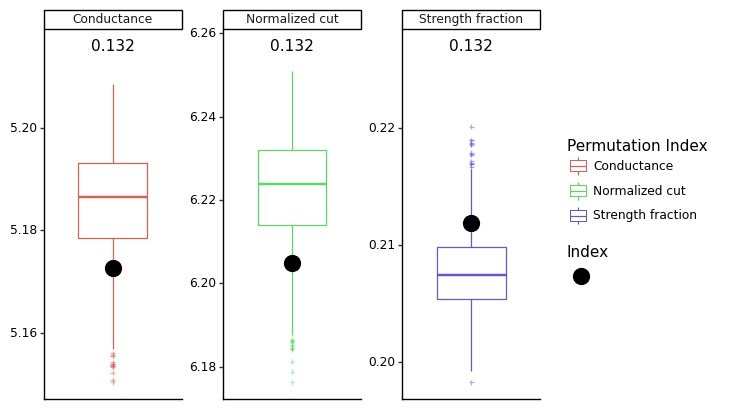

<ggplot: (8741586472668)>

In [65]:
pr_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), pr_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape='+', outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=pr_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), pr_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(pr_plot, "../res/2.pr_6region_right.pdf", units="in", width=6, height=4, verbose=False )
pr_plot

In [18]:
corr_sp[corr_sp<0] = 0
sp_res = utils.significant_test_for_index(corr_sp, region_group, n_perm=1000)
sp_res[-2], sp_res[-1]

(array([0.076, 0.065, 0.048]), array([0.076, 0.076, 0.076]))

In [19]:
sp_dat_boxplot = pd.DataFrame(sp_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
sp_dat_scatter = pd.DataFrame([sp_res[0], sp_res[-1]], index=["Value", "FDR"]).T
sp_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
sp_dat_scatter["y"] = sp_dat_boxplot.groupby(sp_dat_boxplot["Index"]).quantile(0.99).loc[sp_dat_scatter["Index"]].values + 0.01
sp_dat_scatter

,Value,FDR,Index,y
0,0.215201,0.076,Strength fraction,0.230890
1,5.161697,0.076,Conductance,5.222809
2,6.189956,0.076,Normalized cut,6.265765


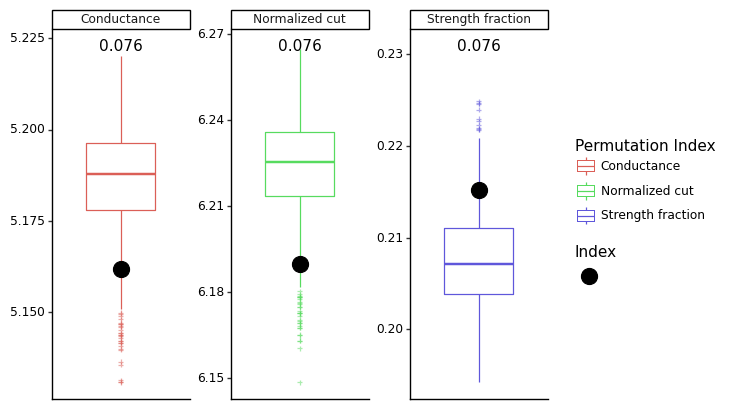

<ggplot: (8741588971207)>

In [20]:
sp_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), sp_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape="+", outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=sp_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), sp_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(sp_plot, "../res/2.sp_6region_right.pdf", units="in", width=6, height=4, verbose=False )
sp_plot

# 2 4 region

## Left

In [66]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

select_idx = info["Region"].isin(["PF", "PFG", "PG", "Opt"])
expr = expr.loc[:, select_idx]
info = info.loc[select_idx, :]

selected_samples = info.index[info["Hemi"] == "Left"]
expr = expr.loc[:, selected_samples]
info = info.loc[selected_samples, :]

In [67]:
expr_scale = pd.DataFrame(preprocessing.scale(expr.T, axis=0)).T
#expr_scale = expr.copy()
corr_pr = expr_scale.corr(method='pearson')
corr_sp = expr_scale.corr(method='spearman')

upper_idx = np.triu(np.ones(shape=corr_pr.shape), 1).astype(bool)
r_pr_sp, p_pr_sp, _ = mantel.test(corr_pr.to_numpy()[upper_idx], corr_sp.to_numpy()[upper_idx], perms=10000, )
r_pr_sp, p_pr_sp

(0.9987079406415307, 0.0001)

In [73]:
region_group = {}
for i, r in enumerate(info["Region"]):
    if not r in region_group:
        region_group[r] = []
    region_group[r].append(i)
region_group = [ region_group[r] for r in region_group ]
region_group

corr_pr[corr_pr<0] = 0
pr_res = utils.significant_test_for_index(corr_pr, region_group, n_perm=1000)
pr_res[-2], pr_res[-1]

(array([0.04 , 0.151, 0.112]), array([0.12 , 0.151, 0.151]))

In [69]:
corr_sp[corr_sp<0] = 0
sp_res = utils.significant_test_for_index(corr_sp, region_group, n_perm=1000)
sp_res[-2], sp_res[-1]

(array([0.043, 0.183, 0.14 ]), array([0.129, 0.183, 0.183]))

In [70]:
pr_dat_boxplot = pd.DataFrame(pr_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
pr_dat_scatter = pd.DataFrame([pr_res[0], pr_res[-1]], index=["Value", "FDR"]).T
pr_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
pr_dat_scatter["y"] = pr_dat_boxplot.groupby(pr_dat_boxplot["Index"]).quantile(0.99).loc[pr_dat_scatter["Index"]].values + 0.01
pr_dat_scatter

,Value,FDR,Index,y
0,0.505452,0.102,Strength fraction,0.610114
1,2.975260,0.193,Conductance,3.532721
2,3.903199,0.193,Normalized cut,4.700606


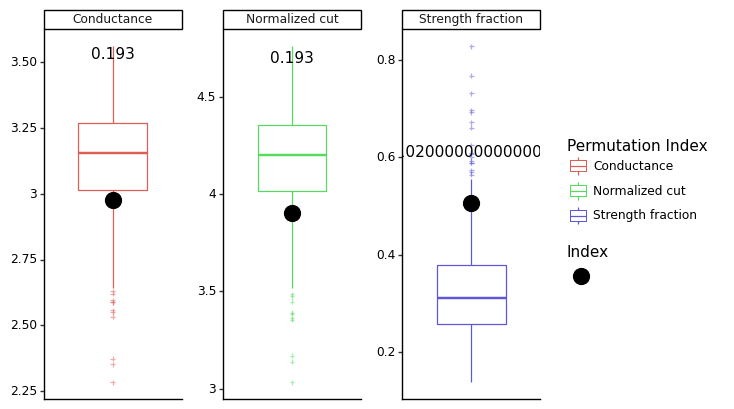

<ggplot: (8741586659618)>

In [71]:
pr_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), pr_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape='+', outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=pr_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), pr_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(pr_plot, "../res/2.pr_4region_left.pdf", units="in", width=6, height=4, verbose=False )
pr_plot

In [42]:
sp_dat_boxplot = pd.DataFrame(sp_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
sp_dat_scatter = pd.DataFrame([sp_res[0], sp_res[-1]], index=["Value", "FDR"]).T
sp_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
sp_dat_scatter["y"] = sp_dat_boxplot.groupby(sp_dat_boxplot["Index"]).quantile(0.99).loc[sp_dat_scatter["Index"]].values + 0.01
sp_dat_scatter

,Value,FDR,Index,y
0,0.665411,0.021,Strength fraction,0.605648
1,2.698515,0.027,Conductance,3.529727
2,3.524824,0.027,Normalized cut,4.711529


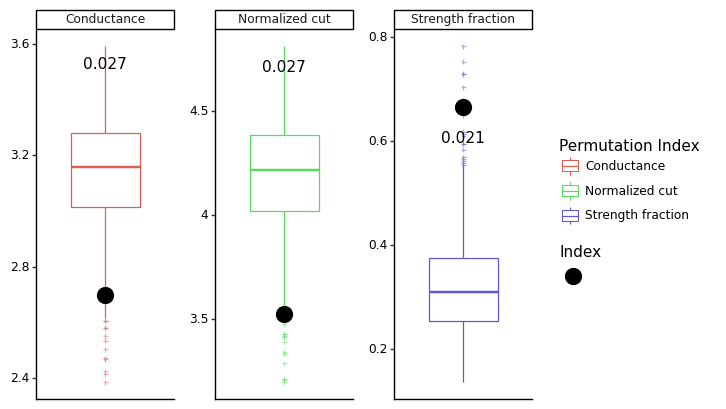

<ggplot: (8741587139554)>

In [43]:
sp_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), sp_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape="+", outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=sp_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), sp_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(sp_plot, "../res/2.sp_4region_left.pdf", units="in", width=6, height=4, verbose=False )
sp_plot

## Right

In [47]:
expr = pd.read_csv("../res/0.preprocessing/sample_expr.tsv", sep="\t", index_col=0)
info = pd.read_csv("../res/0.preprocessing/sample_info.tsv", sep="\t", index_col=0)

select_idx = info["Region"].isin(["PF", "PFG", "PG", "Opt"])
expr = expr.loc[:, select_idx]
info = info.loc[select_idx, :]

selected_samples = info.index[info["Hemi"] == "Right"]
expr = expr.loc[:, selected_samples]
info = info.loc[selected_samples, :]

In [48]:
expr_scale = pd.DataFrame(preprocessing.scale(expr.T, axis=0)).T
#expr_scale = expr.copy()
corr_pr = expr_scale.corr(method='pearson')
corr_sp = expr_scale.corr(method='spearman')

upper_idx = np.triu(np.ones(shape=corr_pr.shape), 1).astype(bool)
r_pr_sp, p_pr_sp, _ = mantel.test(corr_pr.to_numpy()[upper_idx], corr_sp.to_numpy()[upper_idx], perms=10000, )
r_pr_sp, p_pr_sp

(0.9992477767026935, 0.0001)

In [49]:
region_group = {}
for i, r in enumerate(info["Region"]):
    if not r in region_group:
        region_group[r] = []
    region_group[r].append(i)
region_group = [ region_group[r] for r in region_group ]
region_group

corr_pr[corr_pr<0] = 0
pr_res = utils.significant_test_for_index(corr_pr, region_group, n_perm=1000)
pr_res[-2], pr_res[-1]

(array([0.007, 0.027, 0.019]), array([0.021, 0.027, 0.027]))

In [50]:
corr_sp[corr_sp<0] = 0
sp_res = utils.significant_test_for_index(corr_sp, region_group, n_perm=1000)
sp_res[-2], sp_res[-1]

(array([0.008, 0.015, 0.013]), array([0.015, 0.015, 0.015]))

In [51]:
pr_dat_boxplot = pd.DataFrame(pr_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
pr_dat_scatter = pd.DataFrame([pr_res[0], pr_res[-1]], index=["Value", "FDR"]).T
pr_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
pr_dat_scatter["y"] = pr_dat_boxplot.groupby(pr_dat_boxplot["Index"]).quantile(0.99).loc[pr_dat_scatter["Index"]].values + 0.01
pr_dat_scatter

,Value,FDR,Index,y
0,0.677314,0.021,Strength fraction,0.657173
1,2.676237,0.027,Conductance,3.531208
2,3.495309,0.027,Normalized cut,4.722099


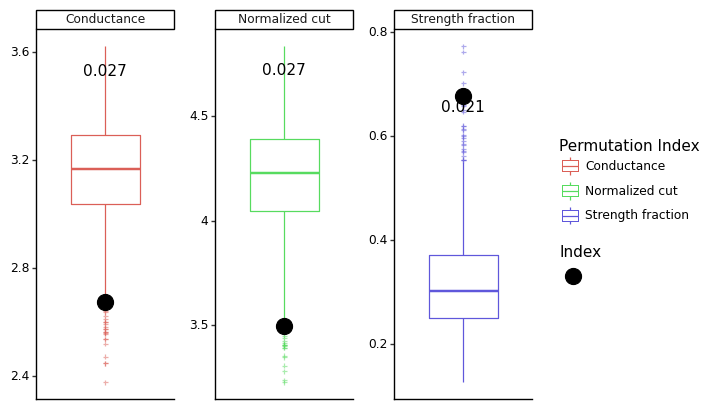

<ggplot: (8741587567345)>

In [52]:
pr_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), pr_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape='+', outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=pr_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), pr_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(pr_plot, "../res/2.pr_4region_right.pdf", units="in", width=6, height=4, verbose=False )
pr_plot

In [53]:
sp_dat_boxplot = pd.DataFrame(sp_res[1], columns=["Strength fraction", "Conductance", "Normalized cut"]).melt(var_name="Index", value_name="Value")
sp_dat_scatter = pd.DataFrame([sp_res[0], sp_res[-1]], index=["Value", "FDR"]).T
sp_dat_scatter["Index"] = ["Strength fraction", "Conductance", "Normalized cut"]
sp_dat_scatter["y"] = sp_dat_boxplot.groupby(sp_dat_boxplot["Index"]).quantile(0.99).loc[sp_dat_scatter["Index"]].values + 0.01
sp_dat_scatter

,Value,FDR,Index,y
0,0.665411,0.015,Strength fraction,0.631855
1,2.698515,0.015,Conductance,3.513097
2,3.524824,0.015,Normalized cut,4.686169


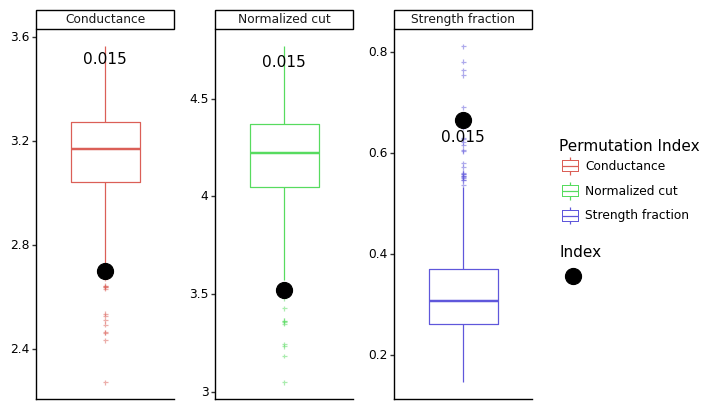

<ggplot: (8741587146400)>

In [54]:
sp_plot = ( p9.ggplot(p9.aes(x="Index", y="Value", color="Index", group="Index"), sp_dat_boxplot) 
  + p9.geom_boxplot(width=0.5, outlier_shape="+", outlier_alpha=0.5)
  + p9.geom_point(p9.aes(x="Index", y="Value", size=5), data=sp_dat_scatter, color="black", )
  + p9.geom_text(p9.aes(x="Index", y="y", label="FDR"), sp_dat_scatter, color="black")
  + p9.facet_wrap("~Index", nrow=1, ncol=3, scales="free")
  + p9.scale_color_discrete(name="Permutation Index")
  + p9.scale_size_continuous(name="Index", breaks=[5], labels=[" "])
  + p9.theme_classic()
  + p9.theme(subplots_adjust={'wspace': 0.30},
             axis_title=p9.element_blank(),
             axis_text_x=p9.element_blank(),
             axis_ticks_major_x=p9.element_blank(),
             axis_text=p9.element_text(color="black")
             
            )
)
p9.ggsave(sp_plot, "../res/2.sp_4region_right.pdf", units="in", width=6, height=4, verbose=False )
sp_plot